In [20]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_pickle('data/SBAmodel.pickle')
# df = pd.read_pickle('data/SBAdata_with_selection.pickle')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
display(df.head(1))
print(df.shape)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997-02-28,1997,84,4,2,0,0,1,0,0,1,NaN,1999-02-28,60000.0,$0.00,1,0.0,60000.0,48000.0


(897167, 27)


# Suppression des outliers
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

## On regarde les distribution en détail suite à SweetViz

In [22]:
from feature_engine.outliers import OutlierTrimmer
from graph_utils import hist_box_plot

df.drop(df[df.Term == 0].index, inplace=True)

hist_box_plot(df, ('Term'))

KeyboardInterrupt: 

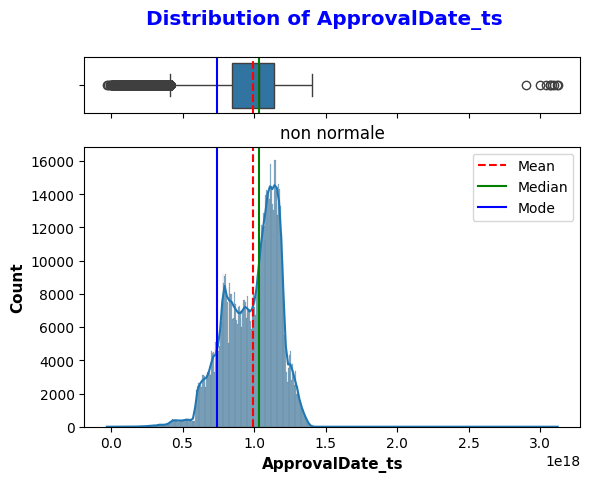

In [ ]:
df['ApprovalDate_ts'] = df.ApprovalDate.astype(int)

hist_box_plot(df, ('ApprovalDate_ts'))

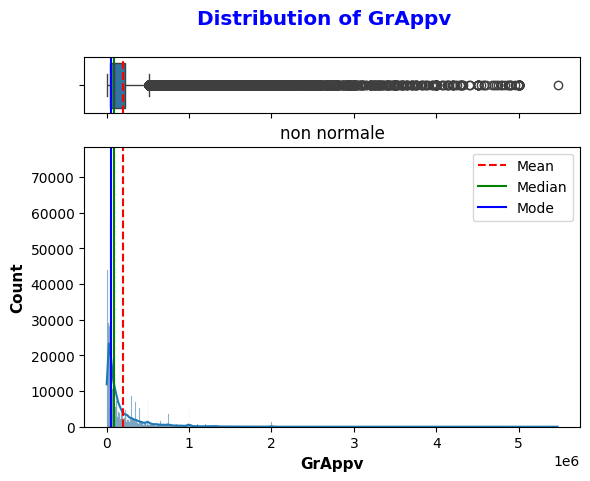

In [ ]:
hist_box_plot(df, ('GrAppv'))

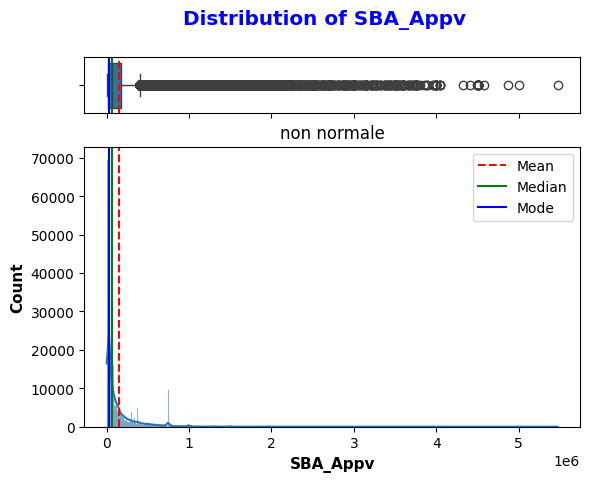

In [ ]:
hist_box_plot(df, ('SBA_Appv'))

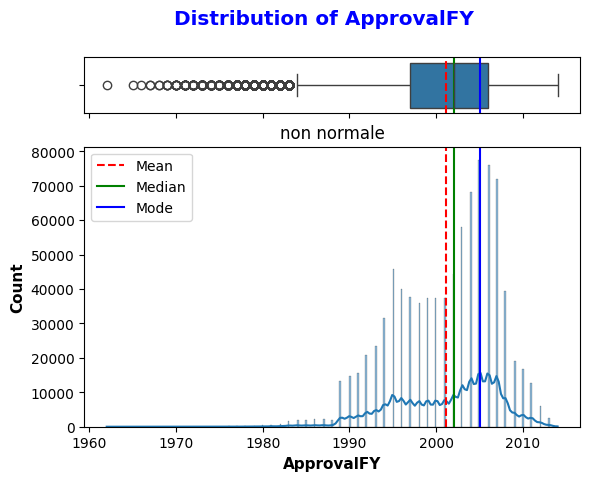

In [ ]:

hist_box_plot(df, ('ApprovalFY'))

Les distribution sont non gaussienne, on utilise la méthode des IQR pour supprimer les outliers


In [ ]:
# ot_r = OutlierTrimmer(capping_method='iqr', tail='right', fold=3, variables=['ApprovalDate_ts'])
# ot_l = OutlierTrimmer(capping_method='iqr', tail='left', fold=3, variables=['ApprovalFY'])

#df = ot_r.fit_transform(df)
# df = ot_l.fit_transform(df)

In [ ]:

#df['immo'] = np.where(df['Term'] >= 240, 1, 0)
# df['NAICS_enc'] = df.NAICS.astype(object).str[0:1].astype(int)

# v = df['BankState'].value_counts()
# for idx,name in enumerate(v.index.tolist()):
#     if v.iloc[idx] < 10000:
#         df.loc[df['BankState'] == name, 'BankState'] = 'unknown'